# Assessment for Machine Learning

## Assessment description

*Paraphrased from the assignment documentation* ... create a web service that uses machine learning to make predictions based on the data set powerproduction provided. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. The submission must be in the form of a git repository containing, at a minimum, the following items:

1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.

## Introduction

In this assignment it is intended to try and determine which method of regression best suits the data presented. In order to do this, the data presented will be split into a training set, comprising between 70 – 80% of the data given, and a test, comprising the remaining 20 – 30%. Regression analysis will be run against the training set, and then compared to the actual results. This analysis will allow for the accuracy of the regression models to be ranked, and determine which model is most accurate.

In addition, the models produced will be saved, and used a website (also found in this GitHub repository). This will allow users to input their own data, and have the various models estimate the outcome.

In total, there will be 3 regression analysis models, namely a linear regression, a decision tree regression, and a random forest regression model. Additionally, there will be a sigmoid analysis model, using a best fit curve. While this is strictly not a regression analysis model, the data seemed to fit the curve, and it was felt that the best models should be used.

## Libraries

Before any analysis can be conducted, it is necessary to import and set up the libraries that will be needed for the poroject. The following libraries are required to process the data, and create the regression models.

    1) Joblib: For saving and retrieving the regression models.
    2) Matplotlib.pyplot: To display the graphs and plots of the data.
    3) Numpy: To complete the error and regression calculations.
    4) Pandas: To store the data in a coherent frame.
    5) Prettytable: To create tables from the data.
    6) Scipy.optimize: To calculate the best curve for the sigmoid regression.
    7) Sklearn: To complete the data splitting, linear, decision tree, and random forest regression, as well as error calculation.

In [2]:
# Import the relevant libraries
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prettytable import PrettyTable
from scipy.optimize import curve_fit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

## Data Source and Cleansing
The data was provided by the lecturer, and can be found in the <a href=“source_data”>source data</a> folder. 

In [5]:
# Source and analysis the data
source_df = pd.read_csv("Source_data/Source_file.csv")          # Read in the source data

print()
print("Source Data descriptions")
print("------------------------")
print(source_df.describe())                                     # Display the general description of the source data


Source Data descriptions
------------------------
            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


A description of the imported data, using pandas, shows that the data consists 2 columns of data, as follows:

    1)	Speed (column 1): a set of speed measurments (presumed to be in metres per second).
    2)	Power (column  2): a set of power measurments (presumed to be in kiloWatts per hour), corresponding to a speed measurement.

Each column is made up of 500 rows, with a range of wind speeds from 0 to 25 m/s, and corresponding power values of 0 to 113.556 kWh. Variuos means, and quartile ranges are given, but this does not give further indication of the shape of the data.

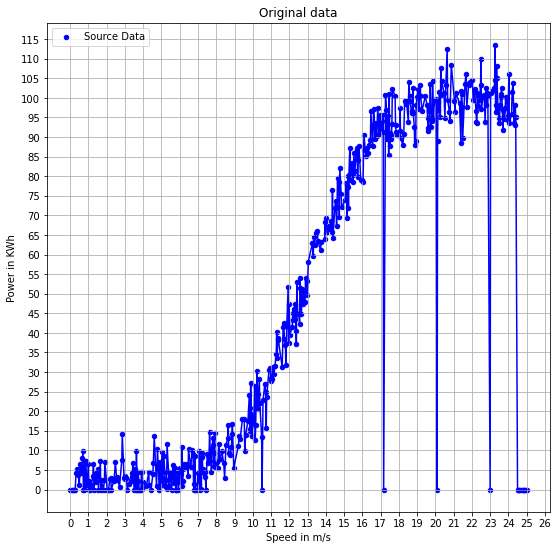

In [12]:
# Plot the data
plt.figure(figsize = (9, 9))                                    # Set the plot size
plt.plot(source_df["speed"], source_df["power"], color = "b")   # Plot the speed and power on a graph, with blue lines between the points
plt.scatter(x = source_df["speed"], y = source_df["power"], s = 20, color = "b", label = "Source Data") # Plot the speed and power on a graph, as black points
plt.xticks(np.arange(0, round(source_df["speed"].max(), 0) + 2, step = 1)) # Force all the xticks to be visible
plt.yticks(np.arange(0, round(source_df["power"].max(), 0) + 4, step = 5)) # Force all the xticks to be visible
plt.grid(which = "major", axis = "x")                           # Show the minor grid lines on the x axis
plt.grid(which = "major", axis = "y")                           # Show the minor grid lines on the y axis
plt.ylabel("Power in KWh")                                      # Label the y axis
plt.xlabel("Speed in m/s")                                      # Label the x axis
plt.legend(loc = "best")                                        # Put the legend in the best place
plt.title("Original data")                                      # Title of the graph
plt.show()                                                      # Show the graph

The plot of the data that the data is roughly S-shaped, or similar to the sigmoid function. Additionally, the plot also shows that there are a number of power values of 0, where there are positive wind speed. This is quite noticeable at wind speeds of approx. 10.5, 17, 20, 23, and above 24.5 m/s. 

These power to wind speed values could provide skewed data, as it does not seem reasonable that the wind is blowing, but not generating any power. As such they will be removed to enable more accurate regression modelling. To do this, any row where the power value is equal to 0, but the wind speed value is not equal to 0 will be removed.

In [8]:
# Creating the cleansed data
cleansed_df = source_df.loc[(source_df["power"] != 0) | ((source_df["speed"] == 0) & (source_df["power"] == 0))]    # Clean the data and drop all locations where there is a wind speed greater than 0, and no power data.

print("Cleansed Data descriptions")
print("--------------------------")
print(cleansed_df.describe())                                   # Display the general description of the cleansed data

Cleansed Data descriptions
--------------------------
            speed       power
count  452.000000  452.000000
mean    12.975531   53.113478
std      6.855738   40.554469
min      0.000000    0.000000
25%      7.294500    8.412750
50%     13.013000   56.123500
75%     18.775250   94.698250
max     24.399000  113.556000


The description of the cleansed data shows that 48 rows of speed have been removed. This has resulted in minor changes to the ranges of the wind speeds and power data. The max wind speed has been reduced from 25 to 24.399 m/s, while the quartile values for both speed and power have increased. The standard deviation for  both data sets has also reduced, suggesting that more of the values are within 1 standard deviation of the mean. 

A plot of both the source and cleansed data shows that the shape of the overall data set has not been visibly altered. The blue dots at teh bottom of the graph, from the original data set, have been removed from the cleansed data set.

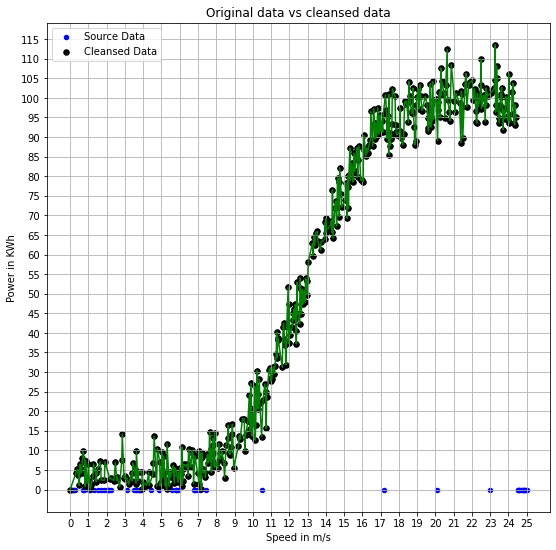

In [11]:
# Replot the source and cleansed data
plt.figure(figsize = (9, 9))                                    # Set the plot size
plt.plot(cleansed_df["speed"], cleansed_df["power"], color = "g") # Plot the speed and power on a graph, with green lines between the points
plt.scatter(x = source_df["speed"], y = source_df["power"], s = 20, color = "b", label = "Source Data") # Plot the speed and power on a graph, as black points
plt.scatter(x = cleansed_df["speed"], y = cleansed_df["power"], s = 30, color = "k", label = "Cleansed Data") # Plot the speed and power on a graph, as black points
plt.xticks(np.arange(0, round(cleansed_df["speed"].max(), 0) + 2, step = 1)) # Force all the xticks to be visible
plt.yticks(np.arange(0, round(cleansed_df["power"].max(), 0) + 4, step = 5)) # Force all the xticks to be visible
plt.grid(which = "major", axis = "x")                           # Show the minor grid lines on the x axis
plt.grid(which = "major", axis = "y")                           # Show the minor grid lines on the y axis
plt.ylabel("Power in KWh")                                      # Label the y axis
plt.xlabel("Speed in m/s")                                      # Label the x axis
plt.legend(loc = "best")                                        # Put the legend in the best place
plt.title("Original data vs cleansed data")                     # Title of the graph
plt.show()                                                      # Show the graph

## Splitting data
In order to conduct any regression analysis, it is necessary to split the data into training and testing data sets. The allocation of the data is done at random, in order to ensure the model has an even distribution of all values to be analysed. In this case the data is split using <a hreaf = https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html>Sklearn’s train_test_split library </a>, with a test size of 25% of the data set. The random state is set to 0 solely to maintain the consistency of the data.


In [28]:
# Splitting data into training and testing arrays
sp_ar, po_ar = cleansed_df["speed"].values, cleansed_df["power"].values # Split the data into separate speed and power arrays

sp_train_ar, sp_test_ar, po_train_ar, po_test_ar = train_test_split(sp_ar, po_ar, test_size = 0.25, random_state = 0)   # Split the arrays into testing (75%) and training (25%) arrays, using random state value 0

print("Training set: %d rows\nTest set: %d rows" %(sp_train_ar.size, sp_test_ar.size))  # Print the size of the training and testing arrays

Training set: 339 rows
Test set: 113 rows


Using this split size results in a training set consisting of 339 rows, and a test set of 113 rows, as above.

### Why do we split the data?
The data is split for a number of reasons. If the data set is large enough, a number of the regression model generation techniques can be quiet resource or cost intensive. By splitting the data, the resources required and/or costs can be reduced <a href =”https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms”> (Brownlee, 2020)</a>. Additionally, splitting the data helps to reduce the risk of overfitting the data when the entire data set is used <a href= https://qr.ae/pNxQZ8> (Chowdhury, 2018)</a>. 

In this case, as the data is large enough, we can split the data into the two sets (training and testing), and still maintain enough of the data to conduct regression analysis, without significant cost or resource implications.


***
## Linear Regression

### What is linear regression?


### How does it work?


### Code actions

In [29]:
lin_model = LinearRegression(fit_intercept=False).fit(sp_train_ar.reshape(-1,1), po_train_ar)   # Create the linear regression model, using the speed and power trainign arrays.
                                                                                                # Note that the intercept is set to 0, as there should not be negative power.
predictions_lin = lin_model.predict(sp_test_ar.reshape(-1,1))   # Use the model to predict the power values using the speed test array 

filename_lin ="Models/lin_reg.pkl"                              # State the file save location
joblib.dump(lin_model, filename_lin)                            # Save the model as lin_reg in the model folder

mse_lin = mean_squared_error(po_test_ar, predictions_lin)       # Determine the mean squared error of the linear regression model
print("mse_lin:\t%.3f" % mse_lin)

rmse_lin = np.sqrt(mse_lin)                                     # Determine the root mean squared error of the linear regression model
print("rmse_lin:\t%.3f" % rmse_lin)

r2_lin = r2_score(po_test_ar, predictions_lin)                  # Determine the square of the correlation of the linear regression model
print("R2_lin:\t\t%.3f%%" % (r2_lin * 100))

mse_lin:	241.408
rmse_lin:	15.537
R2_lin:		84.764%


## Decision Tree Regressor

In [30]:
DTR_model = DecisionTreeRegressor().fit(sp_train_ar.reshape(-1,1), po_train_ar) # Create the decision tree model, using the speed and power training arrays

predictions_DTR = DTR_model.predict(sp_test_ar.reshape(-1,1))   # Use the model to predict the power values using the speed test array

filename_DTR ="Models/DTR.pkl"                                  # State the file save location
joblib.dump(DTR_model, filename_DTR)                            # Save the model as DTR in the model folder

mse_DTR = mean_squared_error(po_test_ar, predictions_DTR)       # Determine the mean squared error of the decision tree regression model
print("mse_DTR:\t%.3f" % mse_DTR)                                      

rmse_DTR = np.sqrt(mse_DTR)                                     # Determine the root mean squared error of the decision tree regression model
print("rmse_DTR:\t%.3f" % rmse_DTR)

r2_DTR = r2_score(po_test_ar, predictions_DTR)                  # Determine the square of the correclation of the decision tree regression model
print("R2_DTR:\t\t%.3f%%" % (r2_DTR * 100))

mse_DTR:	28.328
rmse_DTR:	5.322
R2_DTR:		98.212%


## Random Forest

In [31]:
RFR_model = RandomForestRegressor().fit(sp_train_ar.reshape(-1,1), po_train_ar) # Create the random forest model, using the speed and power training arrays

predictions_RFR = RFR_model.predict(sp_test_ar.reshape(-1,1))   # Use the model to predict the power values using the speed test array 

filename_RFR ="Models/RFR.pkl"                                  # State the file save location
joblib.dump(RFR_model, filename_RFR)                            # Save the model as RFR in the model folder

mse_RFR = mean_squared_error(po_test_ar, predictions_RFR)       # Determine the mean squared error of the random forest regression model
print("mse_RFR:\t%.3f" % mse_RFR)

rmse_RFR = np.sqrt(mse_RFR)                                     # Determine the root mean squared error of the random forest regression model
print("rmse_RFR:\t%.3f" % rmse_RFR)

r2_RFR = r2_score(po_test_ar, predictions_RFR)                  # Determine the square of the correlation of the random forset regression model
print("R2_RFR:\t\t%.3f%%" % (r2_RFR * 100))

mse_RFR:	21.920
rmse_RFR:	4.682
R2_RFR:		98.617%


## Sigmoid Regression

In [32]:
def sigmoid(x, L ,x0, k, b):                                    # Function to define the sigmoid
    y = L / (1 + np.exp(-k*(x-x0)))+b                           # Sigmoid formula
    return (y)                                                  # Return the coefficients for the sigmoid curve

p0 = [max(po_train_ar), np.median(sp_train_ar), 1, min(po_train_ar)]    # Initial guess to start the sigmoid coefficients

popt, pcov = curve_fit(sigmoid, sp_train_ar, po_train_ar, p0, method='dogbox')  # Find the optimized values for the parameters (popt) and covariance of popt

predict_sig = sigmoid(sp_test_ar, *popt)                        # USe the sigmoid optimised values to predict the power values using the speed test array

# Mean squared error
mse_SIG = mean_squared_error(predict_sig, po_test_ar)           # Use sklearn's mean_squared_error to determine the mean squared error of the sigmoid model
print("mse_SIG:\t%.3f" % mse_SIG)

# Root mean squared error
rmse_SIG = np.sqrt(mse_SIG)                                     # Determine the root mean squared error of the sigmoid model
print("RMSE_SIG:\t%.3f" % rmse_SIG)

# r squared calculations
r_matrix = np.corrcoef(po_test_ar, predict_sig)                 # Create a matric of the correlation coefficients of the predicted and actual power values using the power test array
r = r_matrix[0,1]                                               # Choose the values at [0,1] from the matrix to determine the correlation coefficient       
r2_SIG = r**2                                                   # Get r squared by squaring r
print("R2_SIG:\t\t%.3f%%" % (r2_SIG * 100))

# Save arrays for later use 
np.savetxt("Models/popt.csv", popt, delimiter = ",")            # Export the popt values for later reuse

mse_SIG:	16.912
RMSE_SIG:	4.112
R2_SIG:		99.017%


***
## Predictions

In [33]:
# Import the models that are needed to predict the outputs
lin_model_load = joblib.load(filename_lin)                      # Reimport the linear regression model
DTR_model_load = joblib.load(filename_DTR)                      # Reimport the decision tree regression model
RFR_model_load = joblib.load(filename_RFR)                      # Reimport the random forest regression model

Analysis_df = pd.DataFrame(columns = ["speed", "power", "Lin P", "RFR P", "DTR P", "Sig P", "AMEL", "AMER", "AMED", "AMES"])    # Create a new dataframe for the further analysis

j = 0                                                           # Used to iterate through the rows of the cleansed and analysis dataframes

while j < len(sp_test_ar):                                      # Iterate through the test arrays
    
    i = sp_test_ar[j]                                           # Let i equal the speed value from the speed test array
    speed = np.full(shape=1, fill_value=i, dtype="float64").reshape(-1, 1)  # Create a 1d array with the speed value
    Analysis_df.loc[j, "speed"] = i                             # Introduce the speed value to the correct location in the analysis_df
    Analysis_df.loc[j, "power"] = po_test_ar[j]                 # Introduce the power value to the correct location in the analysis_df from the power test array
    Analysis_df.loc[j, "Lin P"] = np.round(lin_model_load.predict(speed)[0], 3)    # Load the speed value into the linear regression model, and enter the result into the analysis_df
    Analysis_df.loc[j, "RFR P"] = np.round(RFR_model_load.predict(speed)[0], 3)    # Load the speed value into the random forest regression model, and enter the result into the analysis_df
    Analysis_df.loc[j, "DTR P"] = np.round(DTR_model_load.predict(speed)[0], 3)    # Load the speed value into the decision tree regression model, and enter the result into the analysis_df
    Analysis_df.loc[j, "Sig P"] = np.round(sigmoid(i, *popt), 3)   # Load the speed value intot the sigmoid model, and enter the result into the analysis_df
    Analysis_df.loc[j, "AMEL"] = abs(Analysis_df.loc[j, "power"] - Analysis_df.loc[j, "Lin P"]) # Determine the absolute difference between the linear regression estimate, and the actual recorded values for the power
    Analysis_df.loc[j, "AMER"] = abs(Analysis_df.loc[j, "power"] - Analysis_df.loc[j, "RFR P"]) # Determine the absolute difference between the random forest regression estimate, and the actual recorded values for the power
    Analysis_df.loc[j, "AMED"] = abs(Analysis_df.loc[j, "power"] - Analysis_df.loc[j, "DTR P"]) # Determine the absolute difference between the decision tree regression estimate, and the actual recorded values for the power
    Analysis_df.loc[j, "AMES"] = abs(Analysis_df.loc[j, "power"] - Analysis_df.loc[j, "Sig P"]) # Determine the absolute difference between the sigmoid model estimate, and the actual recorded values for the power
    j += 1                                                      # Increment the row by one
    
Analysis_df = Analysis_df.apply(pd.to_numeric, errors="coerce") # Force all the dtypes to be floats

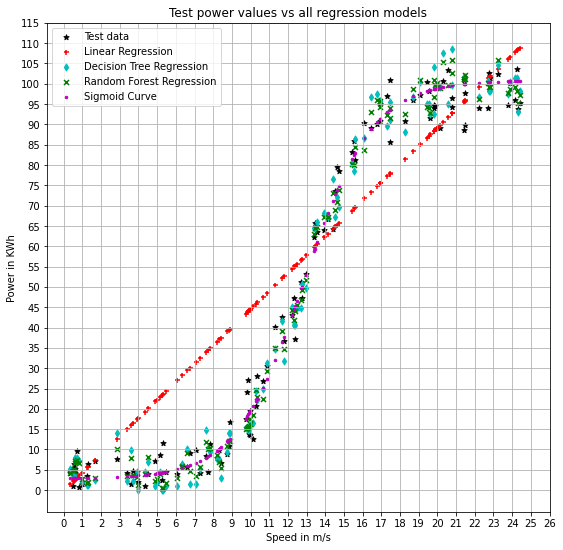

113


In [34]:
plt.figure(figsize = (9,9))                                     # Set the size of the plot area
plt.scatter(Analysis_df["speed"], Analysis_df["power"], s = 30, color = "k", marker = "*", label = "Test data")     # Create a scatter graph using the cleansed data
plt.scatter(Analysis_df["speed"], Analysis_df["Lin P"], s = 25, color = "r", marker = "+", label = "Linear Regression")     # Create a scatter graph using the linear regression estimates from the analysed data
plt.scatter(Analysis_df["speed"], Analysis_df["DTR P"], s = 25, color = "c", marker = "d", label = "Decision Tree Regression")  # Create a scatter graph using the decision tree regression estimates from the analysed data
plt.scatter(Analysis_df["speed"], Analysis_df["RFR P"], s = 25, color = "g", marker = "x", label = "Random Forest Regression")  # Create a scatter graph using the random forest regression estimates from the analysed data
plt.scatter(Analysis_df["speed"], Analysis_df["Sig P"], s = 25, color = "m", marker = ".", label = "Sigmoid Curve")     # Create a scatter graph using the sigmoid model estimated from the analysed data
plt.xticks(np.arange(0, 27, step = 1))                          # Force all the xticks to be visible
plt.yticks(np.arange(0, 120, step = 5))                         # Force all the xticks to be visible
plt.grid(which = "major", axis = "x")                           # Show the minor grid lines on the x axis
plt.grid(which = "major", axis = "y")                           # Show the minor grid lines on the y axis
plt.ylabel("Power in KWh")                                      # Label for the y axis
plt.xlabel("Speed in m/s")                                      # Label for the x axis
plt.legend(loc = "best")                                        # Determine the best location for the legend to be places
plt.title("Test power values vs all regression models")         # Title for the chart
plt.show()                                                      # Plot the graphs
print(j)

***
### Error calculation

In [35]:
# Determine the mean absolute error
AMEL = Analysis_df["AMEL"].sum() / j                            # Sum the analysis_df values of the absolute differences for the linear regression and divide by the number of rows
AMER = Analysis_df["AMER"].sum() / j                            # Sum the analysis_df values of the absolute differences for the random forest regression and divide by the number of rows
AMED = Analysis_df["AMED"].sum() / j                            # Sum the analysis_df values of the absolute differences for the decision tree regression and divide by the number of rows
AMES = Analysis_df["AMES"].sum() / j                            # Sum the analysis_df values of the absolute differences for the sigmoid and divide by the number of rows

table = PrettyTable(["Model / vs test array", "Mean Squared Error", "Root Mean Squared Error", "R square %", "Mean Absolute Error"])    
table.add_row(["Linear Regression", np.round(mse_lin, 3), np.round(rmse_lin, 3), np.round(r2_lin * 100, 3), np.round(AMEL, 3)])
table.add_row(["Decision Tree Regression", np.round(mse_DTR, 3), np.round(rmse_DTR, 3), np.round(r2_DTR * 100, 3), np.round(AMED, 3)])
table.add_row(["Random Tree Regression", np.round(mse_RFR, 3), np.round(rmse_RFR, 3), np.round(r2_RFR * 100, 3), np.round(AMER, 3)])
table.add_row(["Sigmoid Model", np.round(mse_SIG, 3), np.round(rmse_SIG, 3), np.round(r2_SIG * 100, 3), np.round(AMES, 3)])

print(table)

+--------------------------+--------------------+-------------------------+------------+---------------------+
|  Model / vs test array   | Mean Squared Error | Root Mean Squared Error | R square % | Mean Absolute Error |
+--------------------------+--------------------+-------------------------+------------+---------------------+
|    Linear Regression     |      241.408       |          15.537         |   84.764   |        12.835       |
| Decision Tree Regression |       28.328       |          5.322          |   98.212   |        4.229        |
|  Random Tree Regression  |       21.92        |          4.682          |   98.617   |        3.737        |
|      Sigmoid Model       |       16.912       |          4.112          |   99.017   |        3.228        |
+--------------------------+--------------------+-------------------------+------------+---------------------+


***
## Discussion

In [36]:
while True:
    try:
        value = float(input("Input a positive value for the wind speed in m/s:"))   # Request input value from user, and converts from string to float

    except ValueError:                                          # Error/exception handling
        print("Sorry, I did not understand that entry")                 
        continue

    if value < 0:                                               # Check if number positive, as wind speed cannot be negative
        print("Sorry, you can't have negative wind speed")      # Continue with the loop
        continue

    else:
        break                                                   # Break out of the loop

speed_new = np.full(shape=1, fill_value=value, dtype="float64").reshape(-1, 1)  # Input the user provided speed value into a 1d array

print()
print("Choose the which model you would like to try:")
print("1: Linear regression.")
print("2: Random Forest.")
print("3: Decision Tree.")
print("4: Sigmoid Analysis")
print()

while True:
    try:
        model = int(input("Choose the regression model to estimate the power to be generated:"))    # Choose one to the regression models to use

    except ValueError:                                          # Error/exception handling
        print("Sorry, I did not understand that entry")                 
        continue

    if model <= 0 or model > 4:                                 # Check if the number is within the bounds 1 - 4
        print("Sorry, that number is not within the bounds allowed")    # Continue with the loop
        continue

    else:
        break                                                   # Break out of the loop

if model == 1:                                                  # Linear regression model
        result = lin_model_load.predict(speed_new)              # Input the user provided speed into the linear regression model
    
elif model == 2:                                                # Random forest regression model
    result = RFR_model_load.predict(speed_new)                  # Input the user provided speed into the random forest regression model

elif model == 3:                                                # Decision tree regression model
    result = DTR_model_load.predict(speed_new)                  # Input the user provided speed into the decision tree regression model

elif model == 4:                                                # Sigmoid model
    result = sigmoid(speed_new, *popt)                          # Input the user provided speed into the sigmoid model

kmh = speed_new * 3.6                                           # Convert the user provided speed into kilometers per hour
MPH = speed_new * 2.23694                                       # Convert the user provided speed into miles per hour

print()
if speed_new > 113.3:                                           # If the user provided speed equates to more than 113.3 m/s (huricane category 5, highest wind speed ever recorded on Earth)
    print("Warning:\nThis wind speed indicates that there is a category 5 hurricane blowing.\nThis faster than the highest recorded wind speed on the planet.\n\n")
elif speed_new > 70:                                            # If the user provided speed equates to more than 70 m/s (huricane category 5)
    print("Warning:\nThis wind speed indicates that there is a category 5 hurricane blowing.\nThis faster than the highest recorded wind speed in Ireland.\n\n")

elif speed_new > 58.05556:                                      # If the user provided speed equates to more than 58.055 m/s (huricane category 4)
    print("Warning:\nThis wind speed indicates that there is a category 4 hurricane blowing.\nThis faster than the highest recorded wind speed in Ireland.\n\n")

elif speed_new > 52.9878:                                       # If the user provided speed equates to more than 50.555 m/s (the highest wind speed ever recorded in Ireland)
    print("Warning:\nThis wind speed indicates that there is a category 3 hurricane blowing.\nThis faster than the highest recorded wind speed in Ireland.\n\n")

elif speed_new > 49.44444:                                      # If the user provided speed equates to more than 49.444 m/s (huricane category 3)
    print("Warning:\nThis wind speed indicates that there is a category 3 hurricane blowing.\n\n")

elif speed_new > 42.77778:                                      # If the user provided speed equates to more than 42.777 m/s (huricane category 2)
    print("Warning:\nThis wind speed indicates that there is a category 2 hurricane blowing.\n\n")

elif speed_new > 33.05556:                                      # If the user provided speed equates to more than 33.055 m/s (huricane category 1)
    print("Warning:\nThis wind speed indicates that there is a category 1 hurricane blowing.\n\n")

elif speed_new > 28.61111:                                      # If the user provided speed equate to more than 28.611 m/s (storm force winds)
    print("Warning:\nThis wind speed indicates that there is a storm blowing.\n\n")

print("Estimated power produced at wind speed of %.3f m/s (%.2f km/h, %.2f MPH) is %.3f kW/h." % (speed_new, kmh, MPH, result[0]))  # Print the estimated power generated by the user inputted wind speed

Input a positive value for the wind speed in m/s:7

Choose the which model you would like to try:
1: Linear regression.
2: Random Forest.
3: Decision Tree.
4: Sigmoid Analysis

Choose the regression model to estimate the power to be generated:8
Sorry, that number is not within the bounds allowed
Choose the regression model to estimate the power to be generated:2

Estimated power produced at wind speed of 7.000 m/s (25.20 km/h, 15.66 MPH) is 4.261 kW/h.


***
### Bibliography